In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


In [2]:
df=pd.read_csv('dm.csv')
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [3]:
df.shape

(1000, 11)

In [4]:
df.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id'],
      dtype='object')

* Our target is Amount spent. 
* Our target variable is contineuos value so, we can apply Decision Tree regressor

In [5]:
# Customer_id will not influence in analysis , so we can drop 
# Our Target label is AmountSpent, so we should drop from X.
x = df.drop(['Cust_Id', 'AmountSpent'], axis=1)
x.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6
2,Young,Female,Rent,Single,Close,13500,0,Low,18
3,Middle,Male,Own,Married,Close,85600,1,High,18
4,Middle,Female,Own,Single,Close,68400,0,High,12


In [6]:
y=df['AmountSpent']
y.head()

0     755
1    1318
2     296
3    2436
4    1304
Name: AmountSpent, dtype: int64

In [30]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20, random_state=200)
x_train.shape

(800, 17)

In [31]:
x_test.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
674,85500,2,18,1,0,0,1,0,1,0,1,0,1,0,0,0,1
233,74400,0,18,0,1,0,1,0,1,0,1,0,1,0,1,0,0
739,45900,0,12,1,0,0,0,1,0,1,0,1,1,0,0,0,1
865,96100,0,6,1,0,0,0,1,1,0,1,0,1,0,1,0,0
523,72200,0,24,0,1,0,1,0,0,1,1,0,0,1,1,0,0


In [50]:
reg=DecisionTreeRegressor(max_depth=3) # decision tree regressor is a class present in tree module
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [51]:
reg.score(x_train, y_train)

0.7058548041247452

In [52]:
reg.score(x_test, y_test) 

0.6634882283053325

In [53]:
pred=reg.predict(x_test)
pred

array([1212.57142857, 2276.36184211, 1022.53757225, 1640.69911504,
       2276.36184211,  583.046875  ,  407.36111111,  287.15384615,
       1022.53757225, 1022.53757225, 2276.36184211,  583.046875  ,
        583.046875  ,  789.4137931 ,  205.83333333, 1640.69911504,
        583.046875  , 1022.53757225,  364.96969697,  355.21212121,
        583.046875  , 1212.57142857, 3372.43478261, 2276.36184211,
        583.046875  , 1640.69911504, 1022.53757225, 1640.69911504,
        364.96969697, 1022.53757225,  287.15384615,  471.        ,
       2276.36184211, 1640.69911504,  364.96969697, 2276.36184211,
       1640.69911504, 1640.69911504, 2276.36184211, 1022.53757225,
       1022.53757225,  355.21212121,  789.4137931 , 1640.69911504,
       1022.53757225,  583.046875  ,  287.15384615,  407.36111111,
       1022.53757225, 2276.36184211,  583.046875  ,  583.046875  ,
        583.046875  , 2276.36184211,  583.046875  , 2276.36184211,
       1022.53757225, 1022.53757225, 2276.36184211, 2276.36184

In [54]:
df1=pd.DataFrame({'actual':y_test, 'pred':pred}) #but we can't  compare
df1

,actual,pred
674,895,1212.571429
233,2479,2276.361842
739,716,1022.537572
865,1588,1640.699115
523,3069,2276.361842
726,381,583.046875
473,418,407.361111
501,364,287.153846
570,1404,1022.537572
346,508,1022.537572


In [55]:
reg.feature_importances_ #array of magnitutude will be presented 

array([0.65313755, 0.        , 0.16573856, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03270813,
       0.06257607, 0.08583969])

In [56]:
pd.Series(reg.feature_importances_,index=x.columns).sort_values(ascending=False)
# salary is the most important feature

Salary             0.653138
Catalogs           0.165739
History_Medium     0.085840
History_Low        0.062576
History_High       0.032708
Location_Far       0.000000
Location_Close     0.000000
Married_Single     0.000000
Married_Married    0.000000
OwnHome_Rent       0.000000
Gender_Male        0.000000
Gender_Female      0.000000
Age_Young          0.000000
Age_Old            0.000000
Age_Middle         0.000000
Children           0.000000
OwnHome_Own        0.000000
dtype: float64

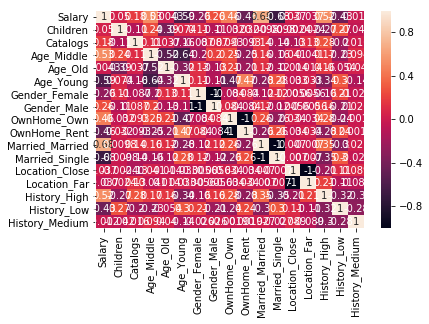

In [57]:
import seaborn as sns
corr=x.corr()
sns.heatmap(corr, annot=True)

In [58]:
# 1. Install graphviz
# 2. set environment variables - control panel

In [59]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import graphviz

In [60]:
!pip install pydotplus
import pydotplus

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


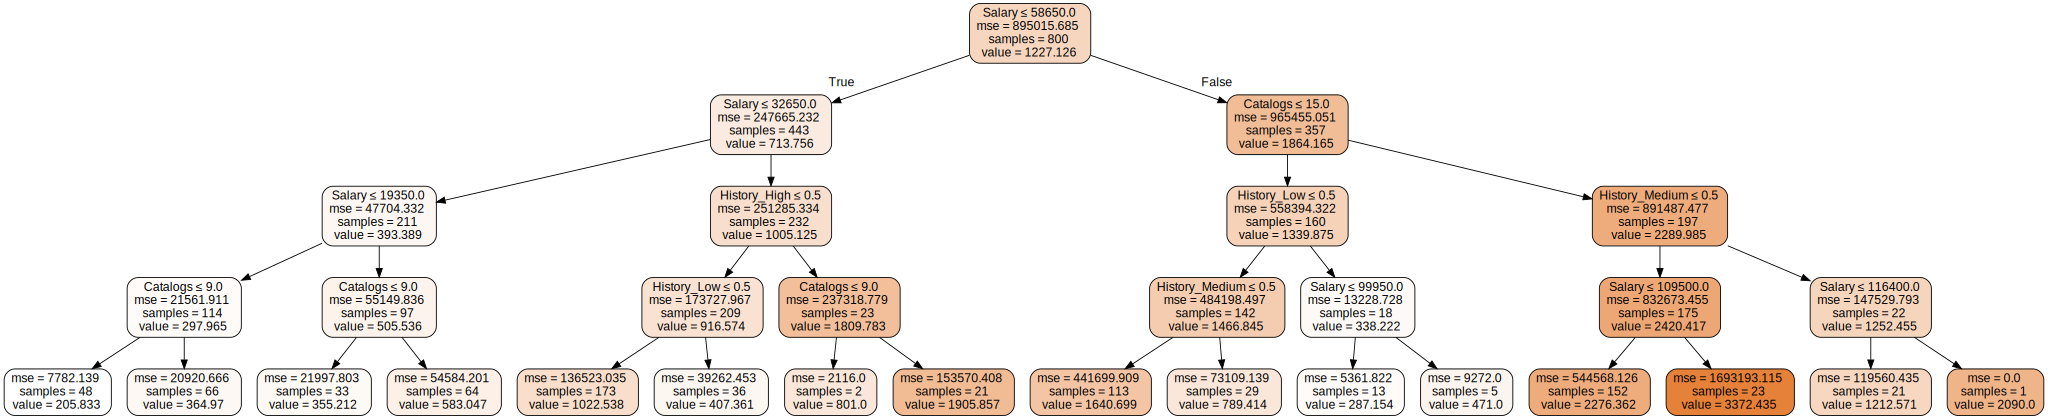

In [61]:
import sklearn.tree as tree
dot_data = tree.export_graphviz(reg, out_file=None,
                                feature_names=x.columns,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

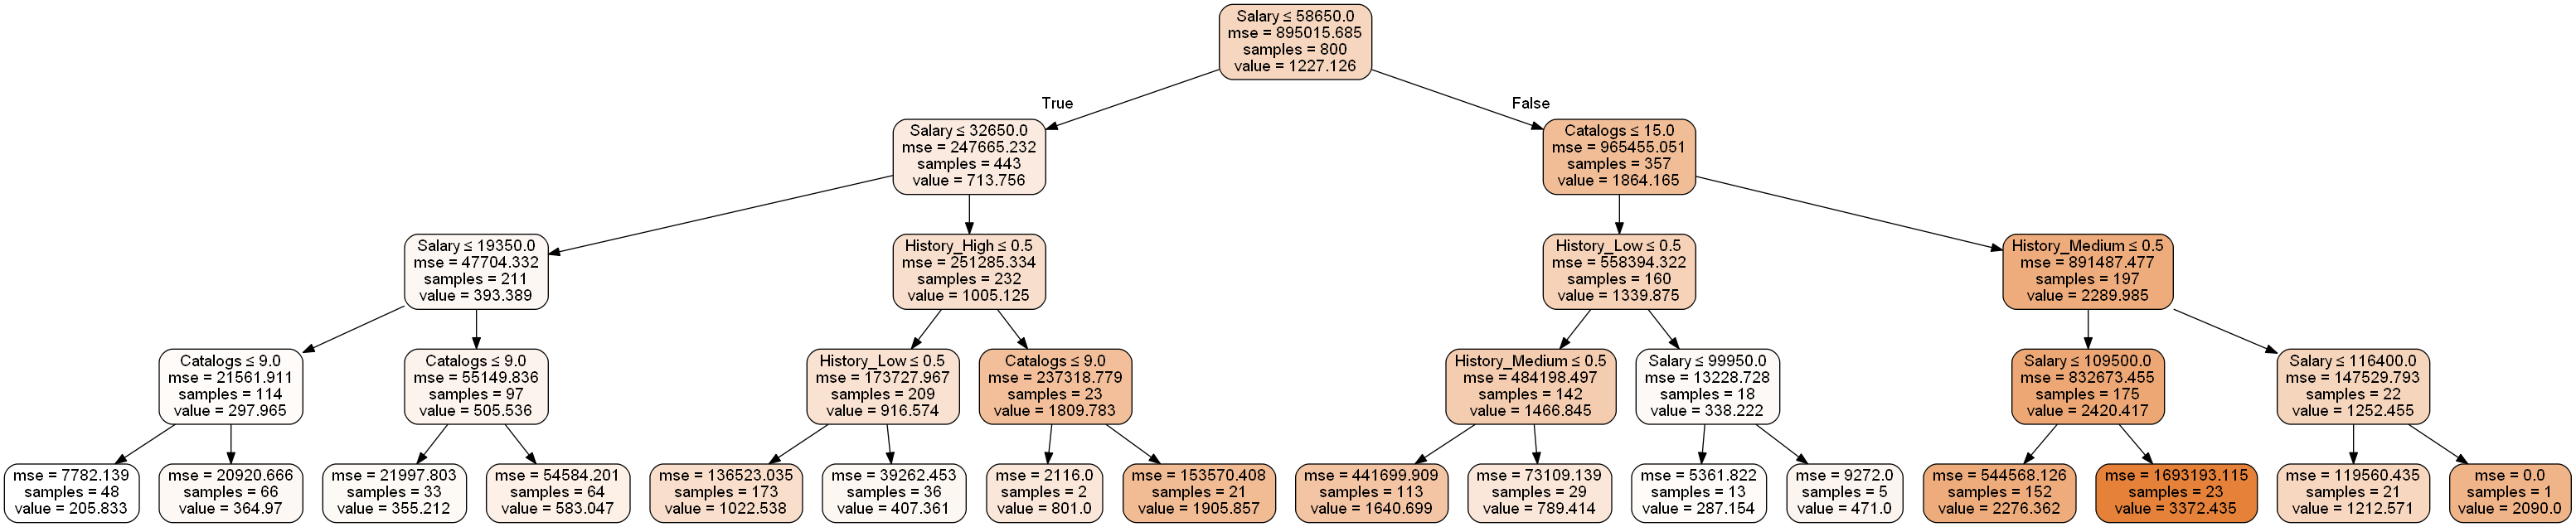

In [62]:
dot_data=StringIO()
export_graphviz(reg, out_file=dot_data, 
                         feature_names=x.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
from IPython.display import Image
im=Image(graph.create_png())
im

In [63]:
!pip install graphviz

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


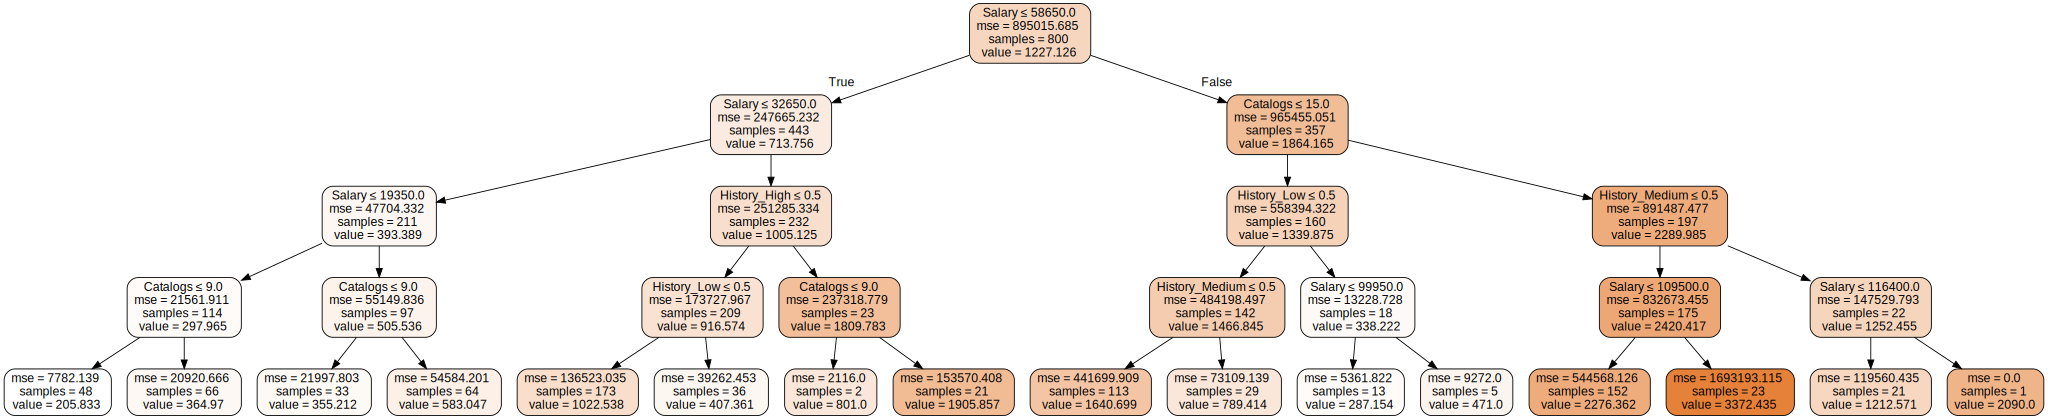

In [64]:
import pydotplus
import sklearn.tree as tree
import graphviz
dot_data=tree.export_graphviz(reg, out_file=None, 
                         feature_names=x.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)

#graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
#Image(graph.create_png())
graph=graphviz.Source(dot_data)
graph

In [65]:
print (dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Salary &le; 58650.0<br/>mse = 895015.685<br/>samples = 800<br/>value = 1227.126>, fillcolor="#e5813952"] ;
1 [label=<Salary &le; 32650.0<br/>mse = 247665.232<br/>samples = 443<br/>value = 713.756>, fillcolor="#e5813929"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Salary &le; 19350.0<br/>mse = 47704.332<br/>samples = 211<br/>value = 393.389>, fillcolor="#e581390f"] ;
1 -> 2 ;
3 [label=<Catalogs &le; 9.0<br/>mse = 21561.911<br/>samples = 114<br/>value = 297.965>, fillcolor="#e5813907"] ;
2 -> 3 ;
4 [label=<mse = 7782.139<br/>samples = 48<br/>value = 205.833>, fillcolor="#e5813900"] ;
3 -> 4 ;
5 [label=<mse = 20920.666<br/>samples = 66<br/>value = 364.97>, fillcolor="#e581390d"] ;
3 -> 5 ;
6 [label=<Catalogs &le; 9.0<br/>mse = 55149.836<br/>samples = 97<br/>value = 505.536>, fillcolor="#e5813918"] ;
2 -> 6 ;
7 [label=<mse = 2199